# Laboratorio No1 - Red Neuronal utilizando dataset CIFAR10
### Academico:
Dr. Oscar Magna Veloso

### Grupo:

*   Felipe Perez Cares
*   Karina Sánchez Pino

## Objetivo

* Generar un modelo de redes neuronales convolucional y no convolucional que pueda detectar si una imagen presentada sea una de las categorias presentadas en el dataset CIFAR10, con el fin de comparar la funcionalidad de ambas redes en el caso de uso presentado

## 0. Revisar existencia de GPU con capacidad CUDA

In [12]:
!nvidia-smi

Sun Apr 16 22:51:30 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 530.41.03              Driver Version: 530.41.03    CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                  Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 750 Ti       Off| 00000000:06:00.0 Off |                  N/A |
| 33%   33C    P8                1W /  38W|    330MiB /  2048MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## 1. Import de librerias

In [13]:
import tensorflow as tf
import io
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical, load_img, img_to_array
from PIL import Image
from http.server import HTTPServer, BaseHTTPRequestHandler

## 2. Carga de dataset

In [14]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

## 3. Preparacion de datos (Normalizar)

In [15]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

#Prepararar las variables de entrada y salida.

### 3.1. Probando dataset

In [5]:
x_train.shape

(50000, 32, 32, 3)

In [6]:
x_test.shape

(10000, 32, 32, 3)

In [7]:
y_train.shape

(50000, 10)

In [8]:
y_test.shape

(10000, 10)

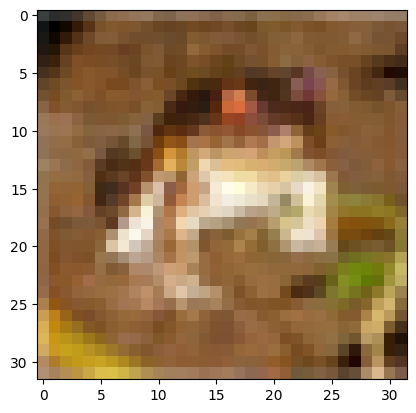

In [5]:
plt.imshow(x_train[0])

## 4. Modelos de red neuronal

### 4.1 Convolucional

In [16]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=x_train.shape[1:]))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

Se utilizan las siguientes capas para la creacion de este modelo:

* Conv2D: con el fin de extraer caracteristicas de cada imagen
* MaxPooling2D: Para reducir la dimensionalidad de los datos y la optimizacion del modelo y las siguientes capas
* Dropout: Descarta cierta cantidad de datos, evitando overfitting
* Flatten: Reduccion de dimensionalidad de las saldias de las capas anteriores, con el fin de preparar los datos de salida
* Dense: Capa densa regular con conexion completa

### 4.2 No Convolucional

In [17]:
model_ncnn = Sequential()
model_ncnn .add(Flatten(input_shape=x_train.shape[1:]))
model_ncnn .add(Dense(1024, activation='relu'))
model_ncnn .add(Dropout(0.5))
model_ncnn .add(Dense(512, activation='relu'))
model_ncnn .add(Dropout(0.5))
model_ncnn .add(Dense(256, activation='relu'))
model_ncnn .add(Dropout(0.5))
model_ncnn .add(Dense(128, activation='relu'))
model_ncnn .add(Dropout(0.5))
model_ncnn .add(Dense(10, activation='softmax'))

Para este modelo solo se utilizan las capas de Flatten, Dense y Dropout

### 4.3 Compilar modelos NN

In [18]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [19]:
model_ncnn.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

## 5. Entrenamiento

### 5.1 Modelo convolucional

In [12]:
history = model.fit(x_train, y_train,
          batch_size=128,
          epochs=30,
          validation_data=(x_test, y_test),
          shuffle=True)

Epoch 1/30
391/391 [==============================] - 19s 35ms/step - loss: 1.6484 - accuracy: 0.4029 - val_loss: 1.2801 - val_accuracy: 0.5524
Epoch 2/30
391/391 [==============================] - 13s 33ms/step - loss: 1.3199 - accuracy: 0.5276 - val_loss: 1.1119 - val_accuracy: 0.6088
Epoch 3/30
391/391 [==============================] - 13s 34ms/step - loss: 1.1916 - accuracy: 0.5782 - val_loss: 1.0176 - val_accuracy: 0.6368
Epoch 4/30
391/391 [==============================] - 13s 33ms/step - loss: 1.1120 - accuracy: 0.6077 - val_loss: 0.9797 - val_accuracy: 0.6564
Epoch 5/30
391/391 [==============================] - 13s 33ms/step - loss: 1.0518 - accuracy: 0.6296 - val_loss: 0.9583 - val_accuracy: 0.6647
Epoch 6/30
391/391 [==============================] - 13s 33ms/step - loss: 0.9954 - accuracy: 0.6452 - val_loss: 0.9136 - val_accuracy: 0.6805
Epoch 7/30
391/391 [==============================] - 13s 34ms/step - loss: 0.9527 - accuracy: 0.6618 - val_loss: 0.9230 - val_accuracy:

### 5.2 Modelo no convolucional

In [16]:
history_ncnn = model_ncnn.fit(x_train, y_train,
          batch_size=128,
          epochs=30,
          validation_data=(x_test, y_test),
          shuffle=True)

Epoch 1/30
391/391 [==============================] - 6s 10ms/step - loss: 2.2822 - accuracy: 0.1363 - val_loss: 2.1555 - val_accuracy: 0.1824
Epoch 2/30
391/391 [==============================] - 4s 9ms/step - loss: 2.1481 - accuracy: 0.1609 - val_loss: 2.1369 - val_accuracy: 0.1679
Epoch 3/30
391/391 [==============================] - 3s 9ms/step - loss: 2.1183 - accuracy: 0.1720 - val_loss: 2.1183 - val_accuracy: 0.1870
Epoch 4/30
391/391 [==============================] - 3s 9ms/step - loss: 2.1053 - accuracy: 0.1768 - val_loss: 2.1512 - val_accuracy: 0.1673
Epoch 5/30
391/391 [==============================] - 4s 9ms/step - loss: 2.0877 - accuracy: 0.1886 - val_loss: 2.0538 - val_accuracy: 0.2181
Epoch 6/30
391/391 [==============================] - 3s 9ms/step - loss: 2.0727 - accuracy: 0.1954 - val_loss: 2.0438 - val_accuracy: 0.2143
Epoch 7/30
391/391 [==============================] - 3s 9ms/step - loss: 2.0671 - accuracy: 0.2015 - val_loss: 2.0787 - val_accuracy: 0.1854
Epoch

### 5.3 Graficas de entrenamiento

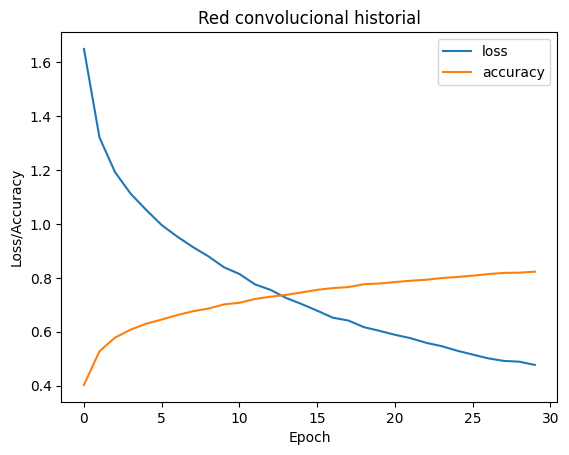

In [28]:
fig, ax = plt.subplots()
ax.plot(history.history['loss'], label='loss')
ax.plot(history.history['accuracy'], label='accuracy')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss/Accuracy')
ax.set_title('Red convolucional historial')
ax.legend()
plt.show()

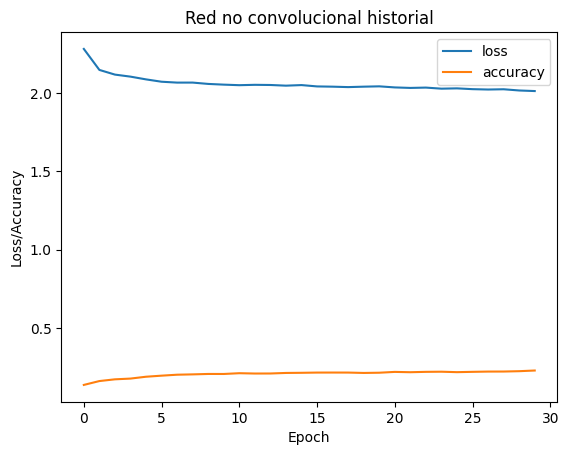

In [29]:
fig, ax = plt.subplots()
ax.plot(history_ncnn.history['loss'], label='loss')
ax.plot(history_ncnn.history['accuracy'], label='accuracy')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss/Accuracy')
ax.set_title('Red no convolucional historial')
ax.legend()
plt.show()

## 6. Guardar y cargar modelos entrenados

### 6.1 Guardado

In [21]:
model.save('models/modelo_cnn.h5')
model_ncnn.save('models/modelo_ncnn.h5')

### 6.2 Cargado

In [20]:
model = tf.keras.models.load_model('models/modelo_cnn.h5')
model_ncnn = tf.keras.models.load_model('models/modelo_ncnn.h5')

## 7. Prueba de prediccion

### 7.1 Con red convolucional

1/1 [==============================] - 1s 877ms/step
Prediccion:  dog


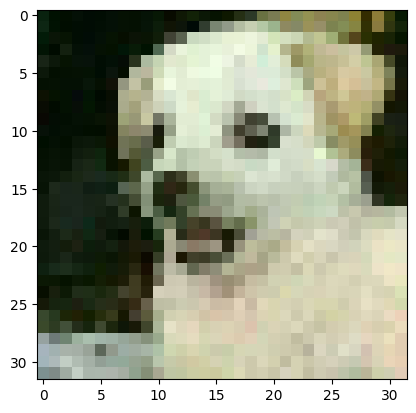

In [22]:
# cargando una imagen
img_path = 'imgs/perro.jpg'
img = load_img(img_path, target_size=(32, 32))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x.astype('float32') / 255

# realizando una prediccion
y_pred = model.predict(x)

clases = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
max = 0
for i in range(10):
  if y_pred[0][i] > max:
    max = y_pred[0][i]
    index = i

print('Prediccion: ', clases[index])

plt.imshow(x[0])

### 7.2 Con red no convolucional

1/1 [==============================] - 0s 54ms/step
Prediccion:  frog


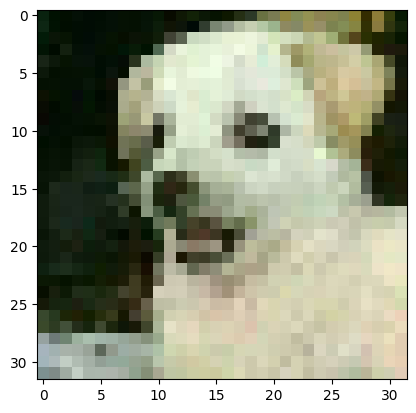

In [8]:
# load an image
img_path = 'imgs/perro.jpg'
img = load_img(img_path, target_size=(32, 32))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x.astype('float32') / 255

# make a prediction
y_pred = model_ncnn.predict(x)

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
max = 0
for i in range(10):
  if y_pred[0][i] > max:
    max = y_pred[0][i]
    index = i

print('Prediccion: ', classes[index])

plt.imshow(x[0])

## 8. Generar servidor para back-end

In [23]:
class SimpleHTTPRequestHandler(BaseHTTPRequestHandler):

    def do_POST(self):
        print("Peticion recibida")
        content_length = int(self.headers['Content-Length'])
        post_data = self.rfile.read(content_length)
        binary_image = post_data.split(b'\r\n\r\n')[1]

        # Decodificar imagen a PIL
        pil_image = Image.open(io.BytesIO(binary_image))
        
        # Transformar a 32x32
        resized_image = pil_image.resize((32, 32))

        # Convertir imagen PIL a numpy array
        np_image = np.array(resized_image)

        # Normalizar
        np_image = np_image / 255.0

        # Generar prediccion
        y_pred = model.predict(np_image.reshape(1, 32, 32, 3))
        clases = ['un avion', 'un auto', 'un ave', 'un gato', 'un ciervo', 'un perro', 'una rana', 'un caballo', 'un barco', 'un camion']
        max = 0
        for i in range(10):
            if y_pred[0][i] > max:
                max = y_pred[0][i]
                index = i

        print('Prediccion: ', clases[index])

        # Generar respuesta a la petición HTTP
        self.send_response(200)
        self.send_header("Access-Control-Allow-Origin", "*")
        self.end_headers()
        self.wfile.write(bytes(clases[index], 'utf-8'))

In [ ]:
print("Iniciando el servidor...")
server = HTTPServer(('localhost', 8000), SimpleHTTPRequestHandler)
server.serve_forever()

## 9. Conclusion

* A base de los resultados obtenidos de ambos modelos de redes neuronales, se puede apreciar una considerable diferencia de precisión entre las redes convolucionales y las redes no convolucionales para este caso de uso.